In [236]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

from scipy.stats import ttest_rel
from statsmodels.stats.weightstats import ttost_paired

In [2]:
df = pd.read_csv('C://duh/Thinkful/Thinkful/Exercises/ESSdata_Thinkful.csv')

In [168]:
df6 = df.drop(df.index[df.year != 6], 0).fillna(0).reset_index(drop=True)
df7 = df.drop(df.index[df.year != 7], 0).fillna(0).reset_index(drop=True)
chdf = df.drop(df.index[df.cntry != 'CH'], 0)
chdf6 = chdf.drop(chdf.index[chdf.year != 6], 0).fillna(0).reset_index(drop=True)
chdf7 = chdf.drop(chdf.index[chdf.year != 7], 0).fillna(0).reset_index(drop=True)
czdf = df.drop(df.index[df.cntry != 'CZ'], 0)
czdf6 = czdf.drop(czdf.index[czdf.year != 6], 0).fillna(0).reset_index(drop=True)
czdf7 = czdf.drop(czdf.index[czdf.year != 7], 0).fillna(0).reset_index(drop=True)
dedf = df.drop(df.index[df.cntry != 'DE'], 0)
dedf6 = dedf.drop(dedf.index[dedf.year != 6], 0).fillna(0).reset_index(drop=True)
dedf7 = dedf.drop(dedf.index[dedf.year != 7], 0).fillna(0).reset_index(drop=True)
esdf = df.drop(df.index[df.cntry != 'ES'], 0)
esdf6 = esdf.drop(esdf.index[esdf.year != 6], 0).fillna(0).reset_index(drop=True)
esdf7 = esdf.drop(esdf.index[esdf.year != 7], 0).fillna(0).reset_index(drop=True)
nodf = df.drop(df.index[df.cntry != 'NO'], 0)
nodf6 = nodf.drop(nodf.index[nodf.year != 6], 0).fillna(0).reset_index(drop=True)
nodf7 = nodf.drop(nodf.index[nodf.year != 7], 0).fillna(0).reset_index(drop=True)
sedf = df.drop(df.index[df.cntry != 'SE'], 0)
sedf6 = sedf.drop(sedf.index[sedf.year != 6], 0).fillna(0).reset_index(drop=True)
sedf7 = sedf.drop(sedf.index[sedf.year != 7], 0).fillna(0).reset_index(drop=True)

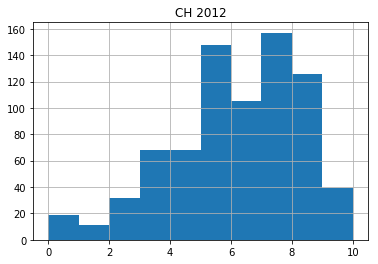

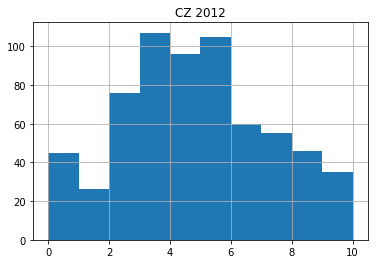

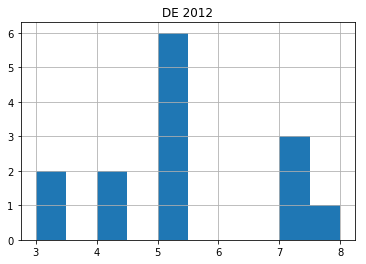

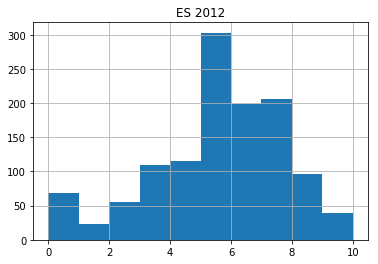

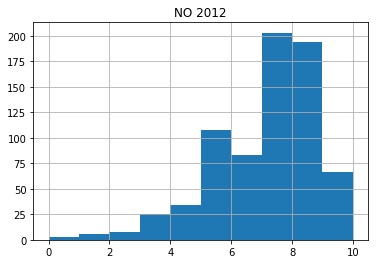

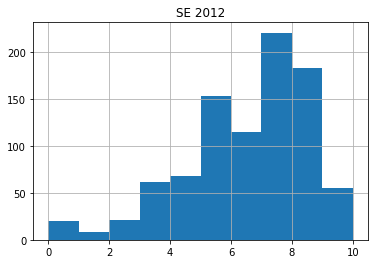

In [169]:
for cntry in df.cntry.unique():
    df.where(df.cntry == cntry).ppltrst.where(df.year == 6).hist()
    plt.title(cntry + ' 2012')
    plt.show()

## Question 1: Did people become less trusting from 2012 to 2014?

As we are sampling data from the same group of individuals at two different intervals, we can use a paired t-test to determine if there was a significant change (p-value < .05) of the variable. Below we preform the t-test by country.

In [170]:
print("CH: " + str(ttest_rel(chdf6.ppltrst, chdf7.ppltrst)))
print("CZ: " + str(ttest_rel(czdf6.ppltrst, czdf7.ppltrst)))
print("DE: " + str(ttest_rel(dedf6.ppltrst, dedf7.ppltrst)))
print("ES: " + str(ttest_rel(esdf6.ppltrst, esdf7.ppltrst)))
print("NO: " + str(ttest_rel(nodf6.ppltrst, nodf7.ppltrst)))
print("SE: " + str(ttest_rel(sedf6.ppltrst, sedf7.ppltrst)))

CH: Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ: Ttest_relResult(statistic=-0.7526559883286866, pvalue=0.4519262480986391)
DE: Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES: Ttest_relResult(statistic=2.568723866973941, pvalue=0.010326232284012218)
NO: Ttest_relResult(statistic=0.5307544296818665, pvalue=0.5957503880320327)
SE: Ttest_relResult(statistic=-2.2042507796416118, pvalue=0.027757203812996307)


It seems that for Spain and Sweden, there was a significant change.

Here, we can determine rather the mean went up or down per country.

In [171]:
for cntry in df.cntry.unique():
    print(cntry)
    print('2012: ' + str(df.where(df.cntry == cntry).ppltrst.where(df.year == 6).mean()))
    print('2014: ' + str(df.where(df.cntry == cntry).ppltrst.where(df.year == 7).mean()))
    print('Difference between 2014 and 2012: ' + str(df.where(df.cntry == cntry).ppltrst.where(df.year == 7).mean() - df.where(df.cntry == cntry).ppltrst.where(df.year == 6).mean()))

CH
2012: 5.677878395860285
2014: 5.751617076326003
Difference between 2014 and 2012: 0.07373868046571808
CZ
2012: 4.362519201228879
2014: 4.424657534246576
Difference between 2014 and 2012: 0.062138333017697
DE
2012: 5.214285714285714
2014: 5.357142857142857
Difference between 2014 and 2012: 0.14285714285714235
ES
2012: 5.114591920857379
2014: 4.895127993393889
Difference between 2014 and 2012: -0.2194639274634893
NO
2012: 6.64931506849315
2014: 6.598630136986301
Difference between 2014 and 2012: -0.05068493150684894
SE
2012: 6.058498896247241
2014: 6.257709251101321
Difference between 2014 and 2012: 0.19921035485408023


We have determined that for Spain, people became less trusting in 2014 than in 2012. However, Sweden seems to have become more trusting over the same period.

However, if we look at the European nations on a whole, it seems there was no significant change in the populace.

In [198]:
ttest_rel(df6.ppltrst, df7.ppltrst)

Ttest_relResult(statistic=-0.030123296813187022, pvalue=0.9759701202629605)

In [221]:
a = chdf.drop(chdf.index[chdf.year != 6], 0).reset_index(drop=True)
b = chdf.drop(chdf.index[chdf.year != 7], 0).reset_index(drop=True)

In [222]:
c = a.drop(b.index[b.ppltrst.isna()], 0).reset_index(drop=True)
d = b.drop(a.index[a.ppltrst.isna()], 0).reset_index(drop=True)

In [237]:
ttest_rel(a.ppltrst, b.ppltrst)

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

In [243]:
ttost_paired(a.ppltrst, b.ppltrst, 0, 11)

(0.7448528244349433,
 (-0.6586851756725737, 0.7448528244349433, 772.0),
 (-98.91833515363564, 0.0, 772.0))